In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff

from sklearn.model_selection import cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm
import time

In [130]:
# year1 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/1year.arff')
# year2 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/2year.arff')
# year3 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/3year.arff')
# year4 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/4year.arff')
# year5 = loadarff('/Users/taddbackus/School/fall23/qtw/cs4/data/5year.arff')


year1 = loadarff('/Users/austi/Documents/QTW/CS 4 Data/1year.arff')
year2 = loadarff('/Users/austi/Documents/QTW/CS 4 Data/2year.arff')
year3 = loadarff('/Users/austi/Documents/QTW/CS 4 Data/3year.arff')
year4 = loadarff('/Users/austi/Documents/QTW/CS 4 Data/4year.arff')
year5 = loadarff('/Users/austi/Documents/QTW/CS 4 Data/5year.arff')


year1DF = pd.DataFrame(year1[0])
year2DF = pd.DataFrame(year2[0])
year3DF = pd.DataFrame(year3[0])
year4DF = pd.DataFrame(year4[0])
year5DF = pd.DataFrame(year5[0])


In [131]:
year1DF['year'] = 1
year2DF['year'] = 2
year3DF['year'] = 3
year4DF['year'] = 4
year5DF['year'] = 5

In [132]:
frames = [year1DF, year2DF, year3DF, year4DF, year5DF]
data = pd.concat(frames)
data.reset_index(drop=True,inplace=True)
for i in frames:
    print(i.shape)
print(data.shape)

(7027, 66)
(10173, 66)
(10503, 66)
(9792, 66)
(5910, 66)
(43405, 66)


In [133]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,2.939753
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,1.283975
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,1.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,2.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,3.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,5.000000


In [134]:
missingData = []
for i in data:
    if data[i].isnull().sum() > 0:
        print(i,':',data[i].isnull().sum(),'missing')
        print(i,':',data[i].isnull().sum() / len(data),'%')
        missingData.append(i)

Attr1 : 8 missing
Attr1 : 0.00018431056329915908 %
Attr2 : 8 missing
Attr2 : 0.00018431056329915908 %
Attr3 : 8 missing
Attr3 : 0.00018431056329915908 %
Attr4 : 134 missing
Attr4 : 0.0030872019352609146 %
Attr5 : 89 missing
Attr5 : 0.0020504550167031446 %
Attr6 : 8 missing
Attr6 : 0.00018431056329915908 %
Attr7 : 8 missing
Attr7 : 0.00018431056329915908 %
Attr8 : 94 missing
Attr8 : 0.0021656491187651192 %
Attr9 : 9 missing
Attr9 : 0.00020734938371155397 %
Attr10 : 8 missing
Attr10 : 0.00018431056329915908 %
Attr11 : 44 missing
Attr11 : 0.001013708098145375 %
Attr12 : 134 missing
Attr12 : 0.0030872019352609146 %
Attr13 : 127 missing
Attr13 : 0.0029259301923741502 %
Attr14 : 8 missing
Attr14 : 0.00018431056329915908 %
Attr15 : 36 missing
Attr15 : 0.0008293975348462159 %
Attr16 : 95 missing
Attr16 : 0.002188687939177514 %
Attr17 : 94 missing
Attr17 : 0.0021656491187651192 %
Attr18 : 8 missing
Attr18 : 0.00018431056329915908 %
Attr19 : 128 missing
Attr19 : 0.0029489690127865453 %
Attr20 : 

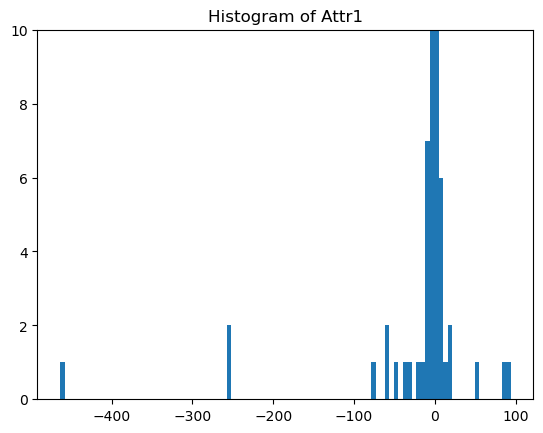

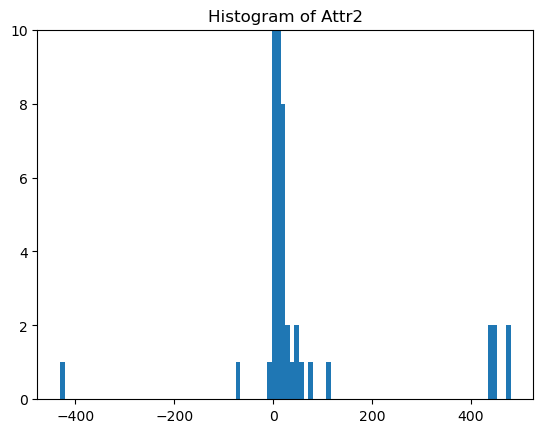

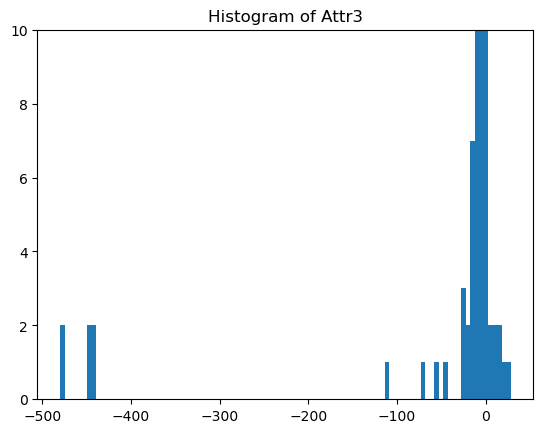

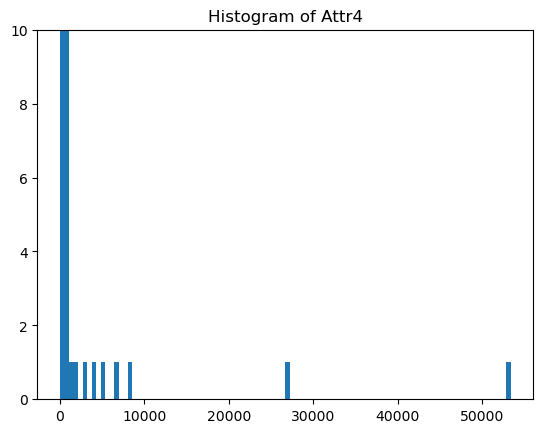

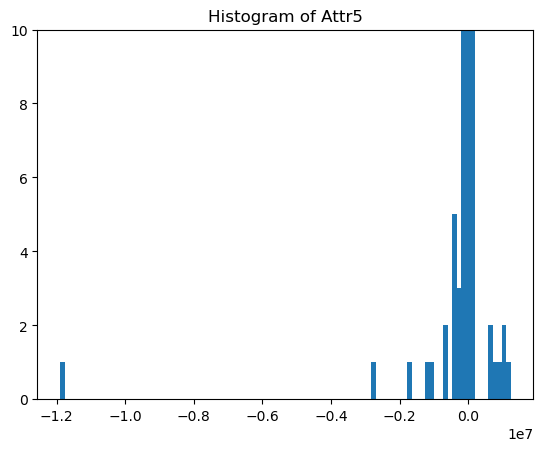

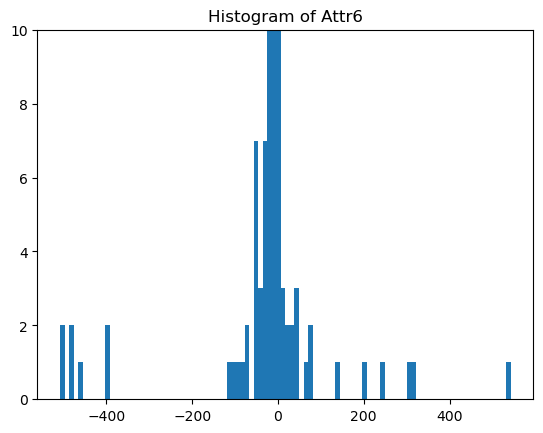

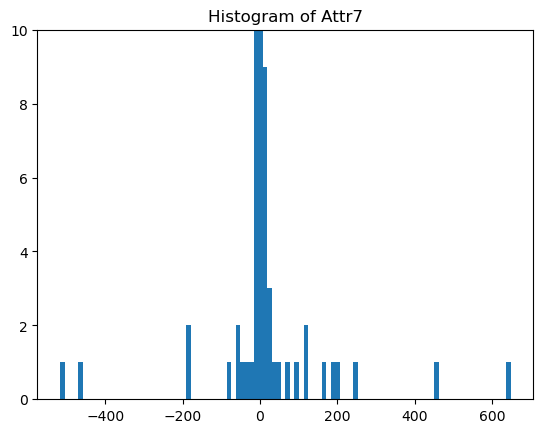

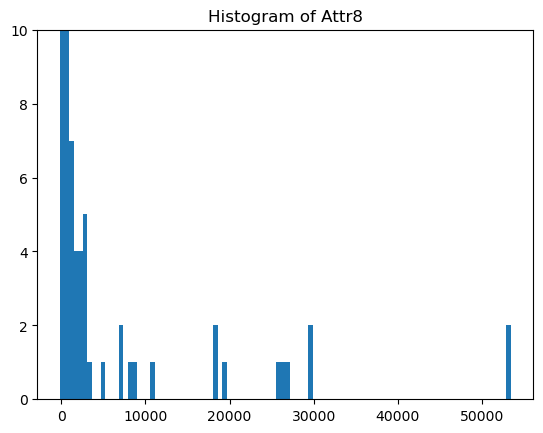

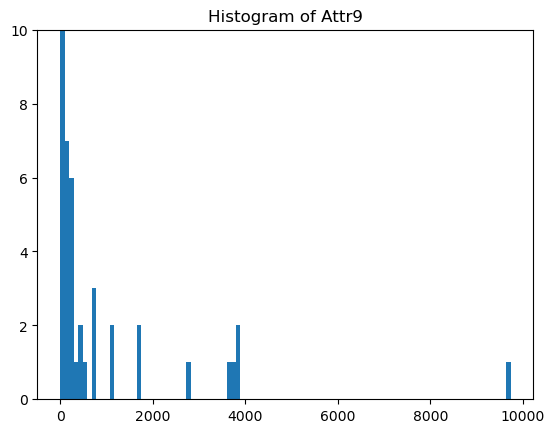

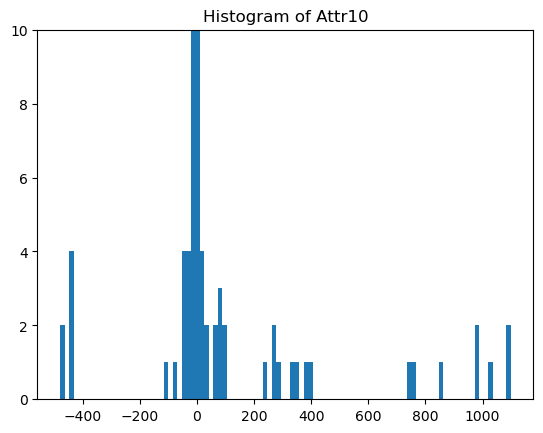

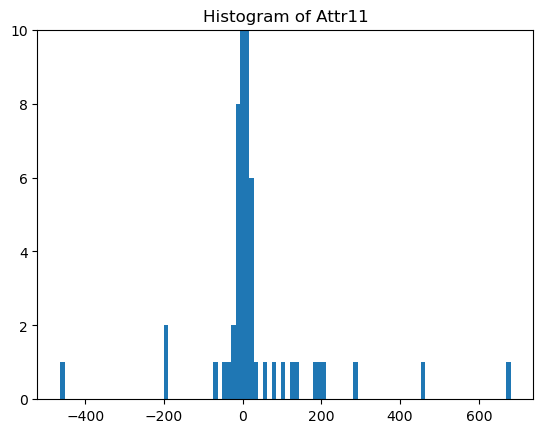

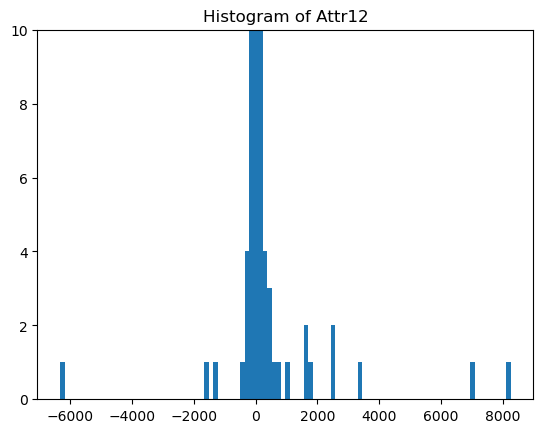

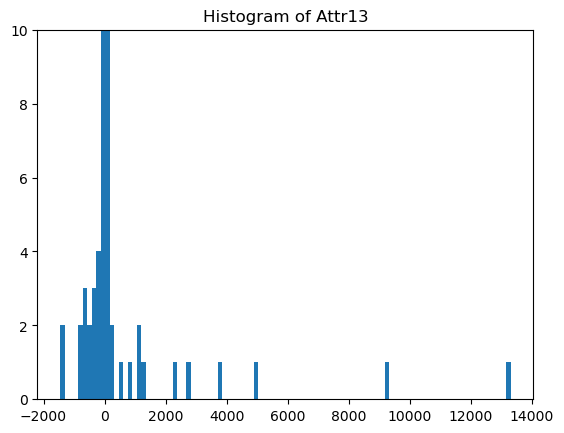

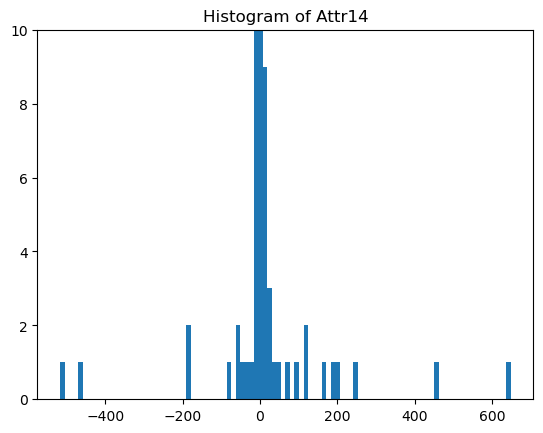

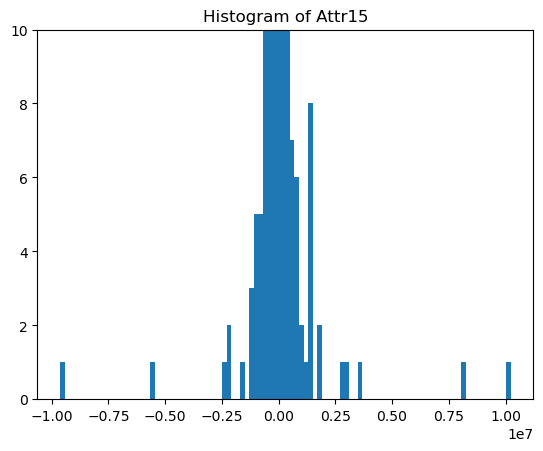

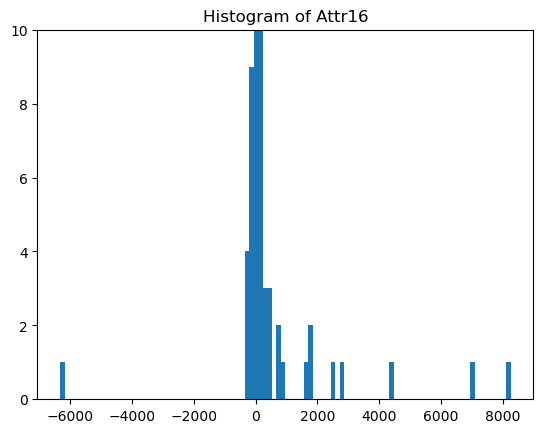

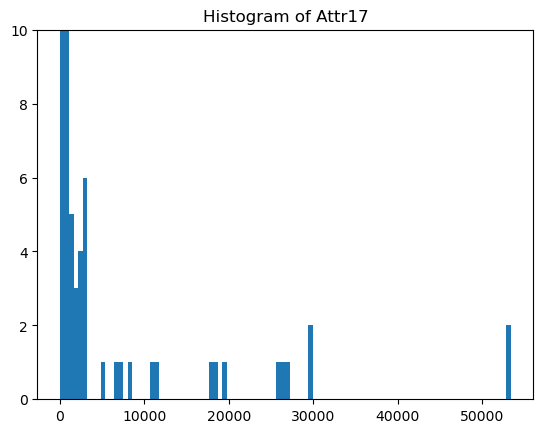

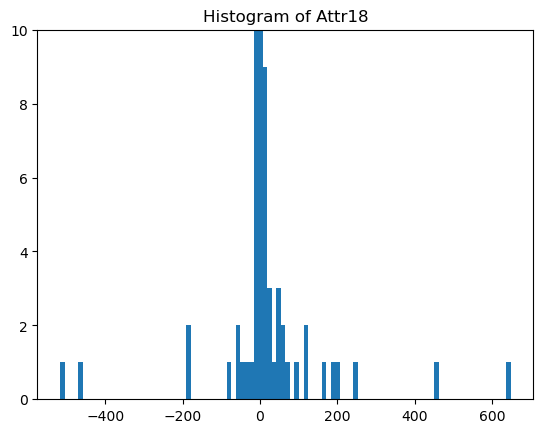

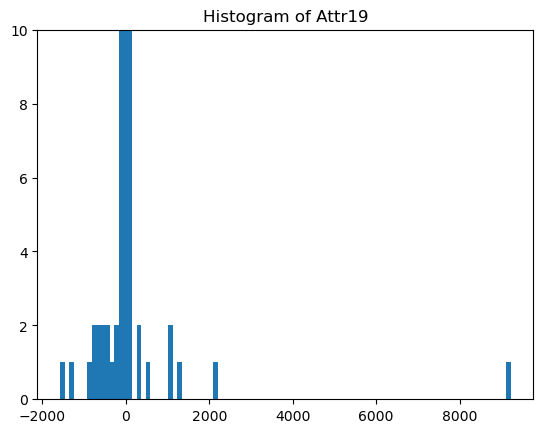

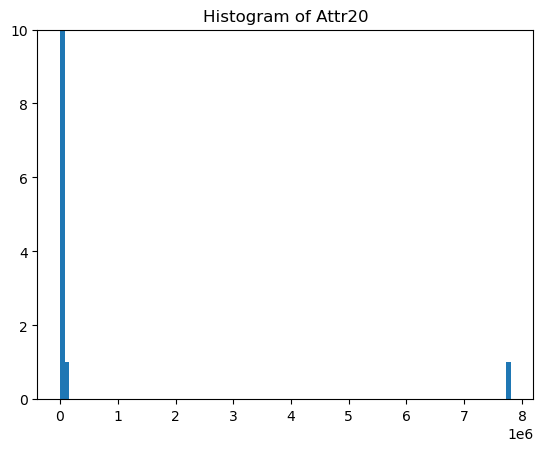

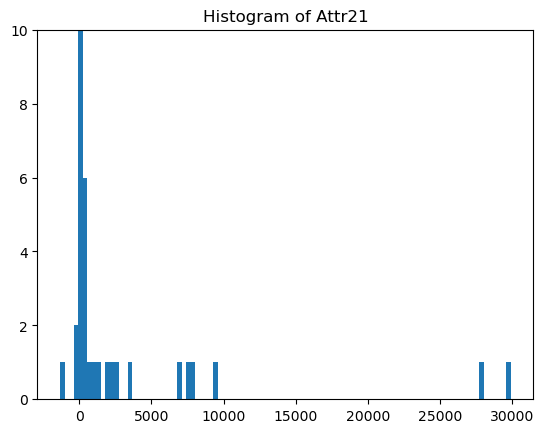

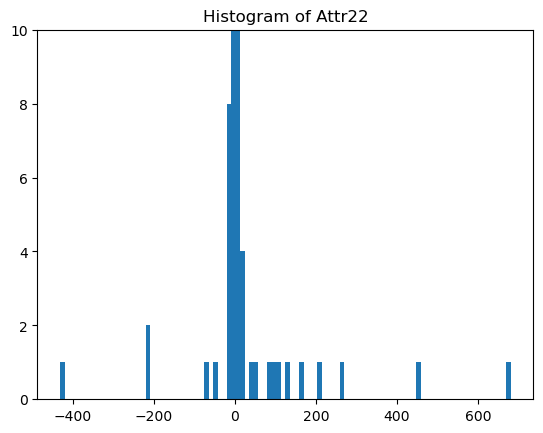

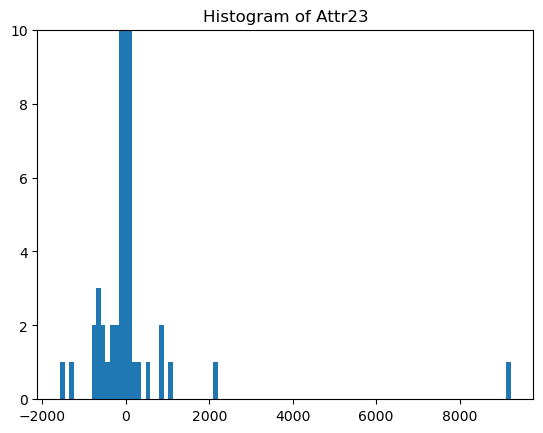

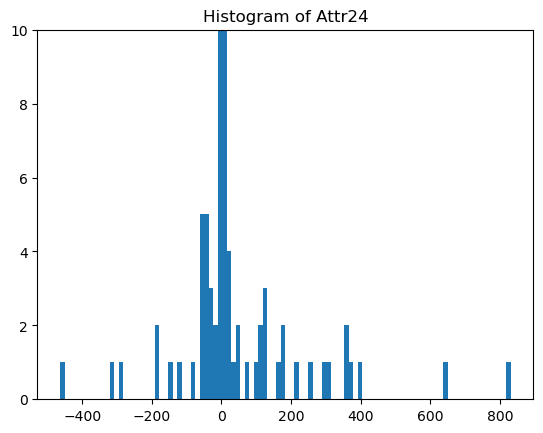

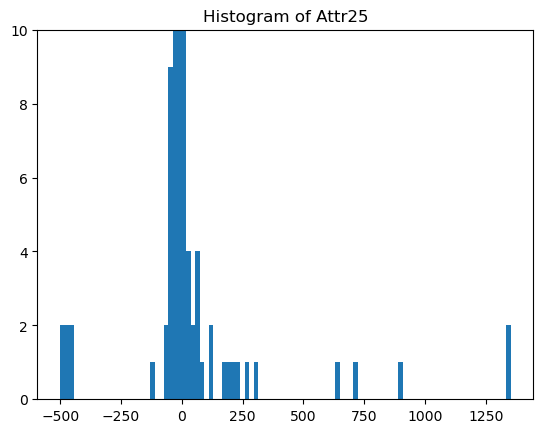

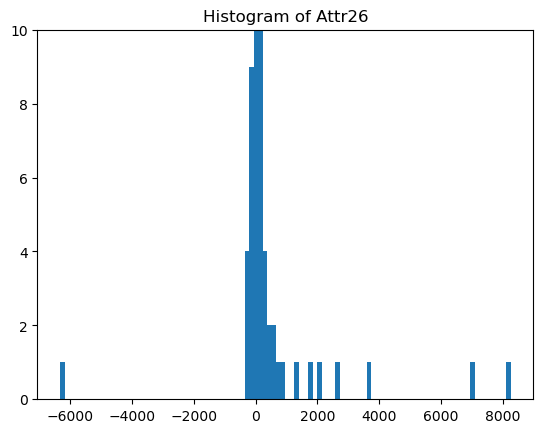

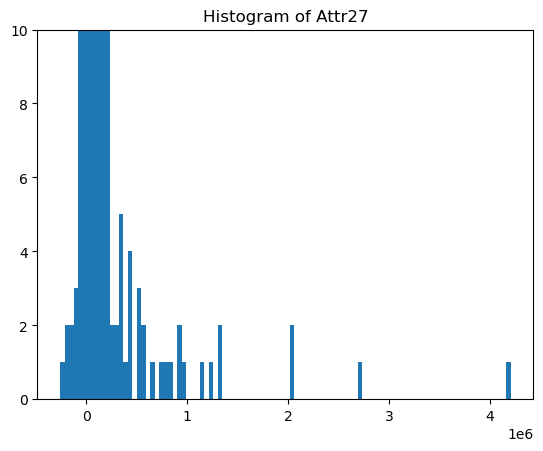

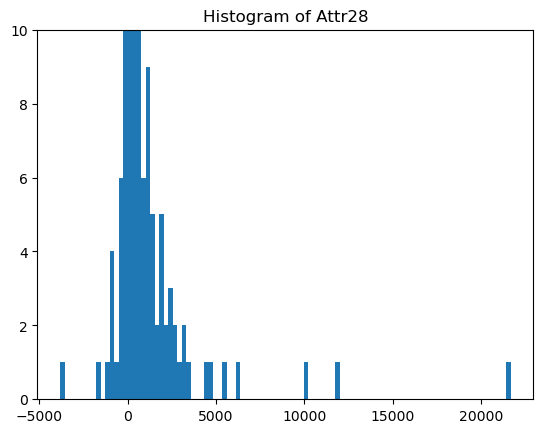

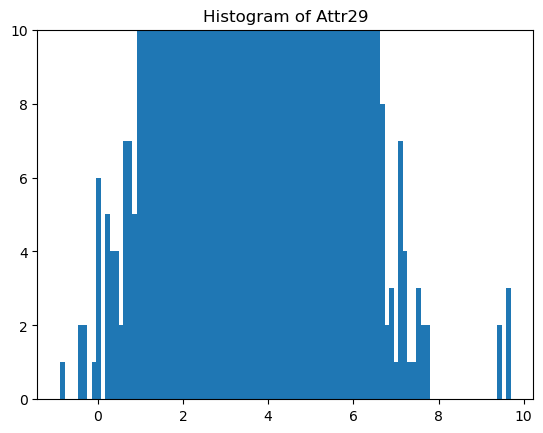

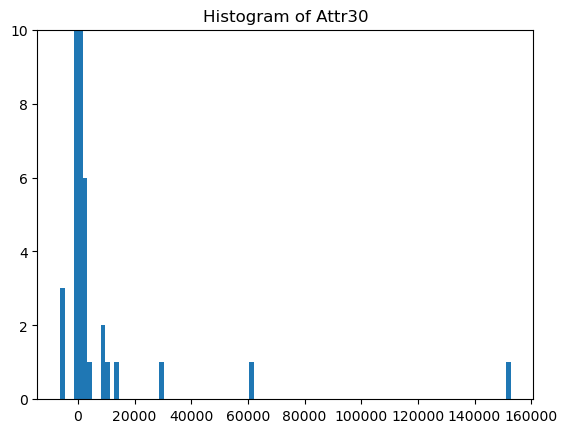

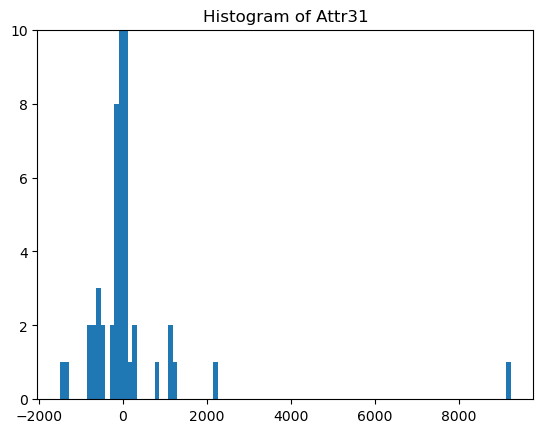

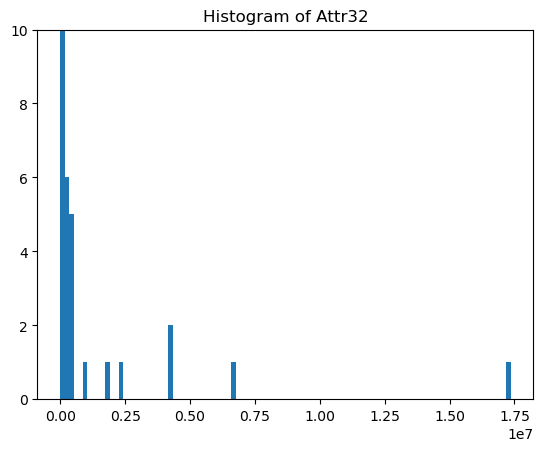

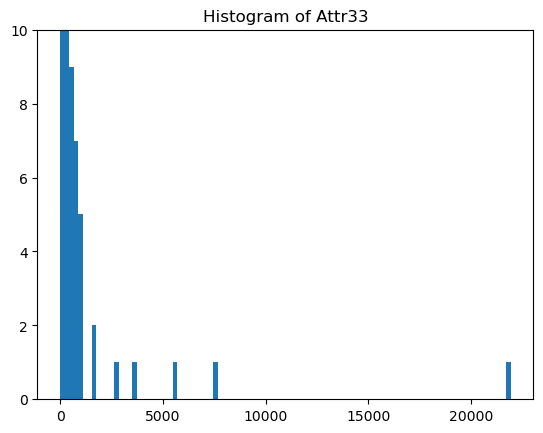

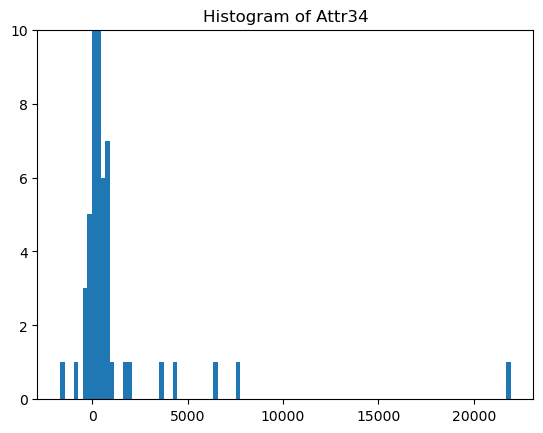

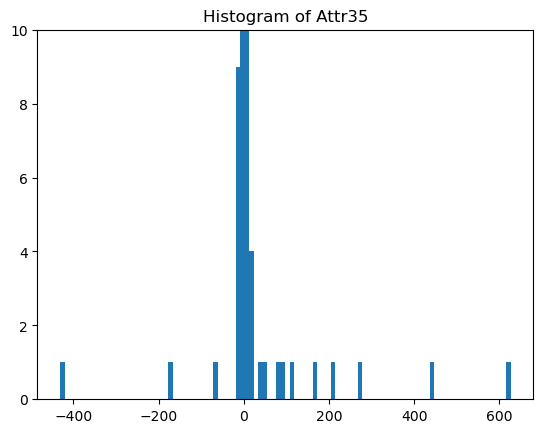

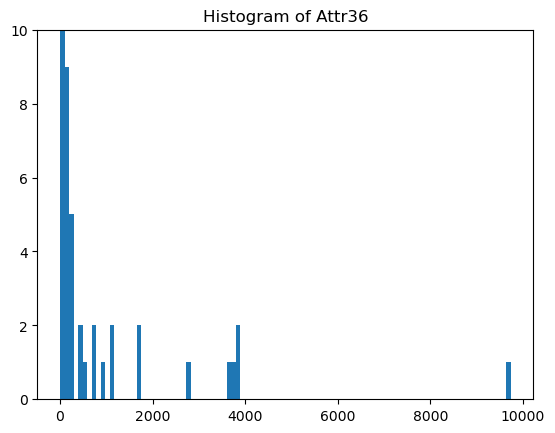

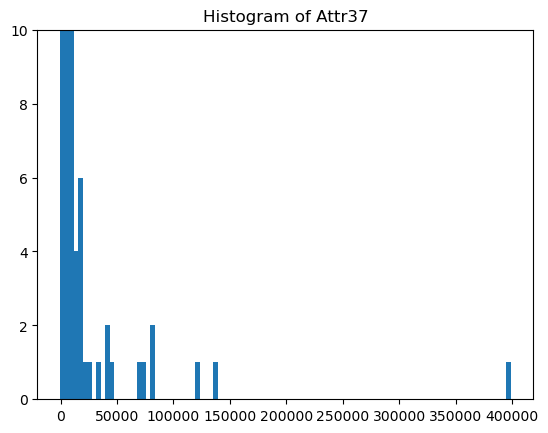

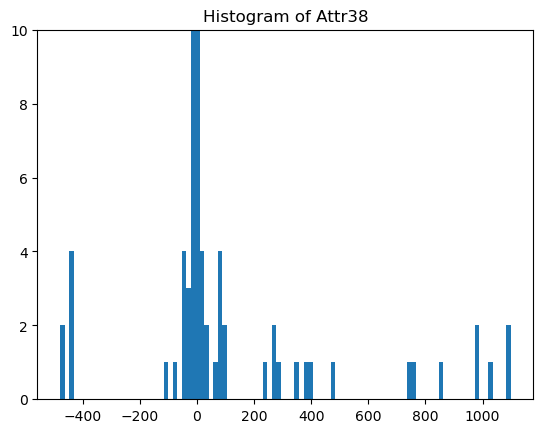

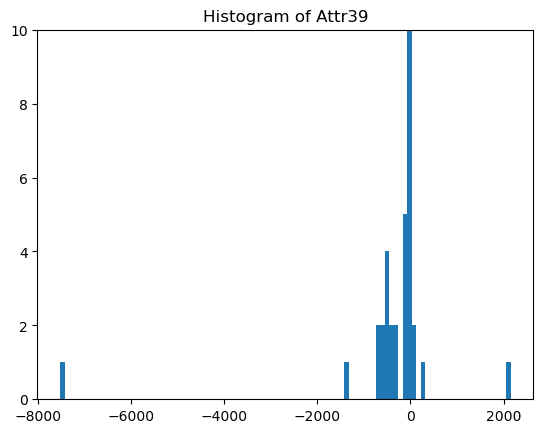

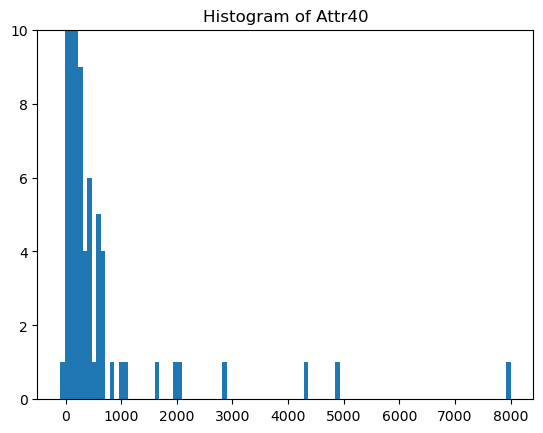

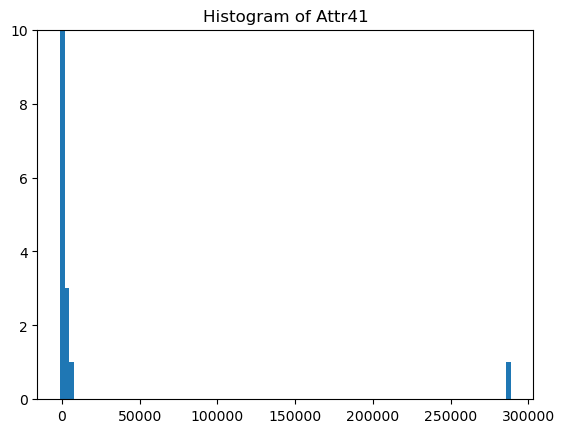

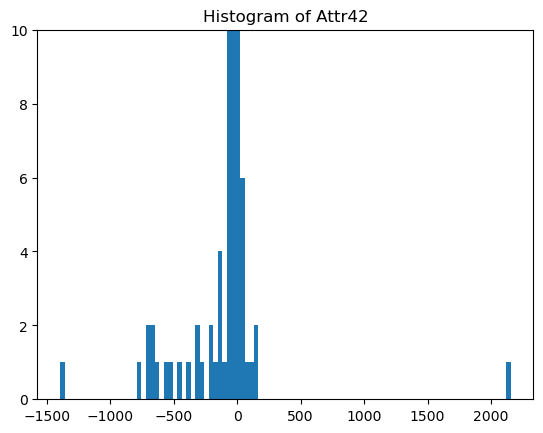

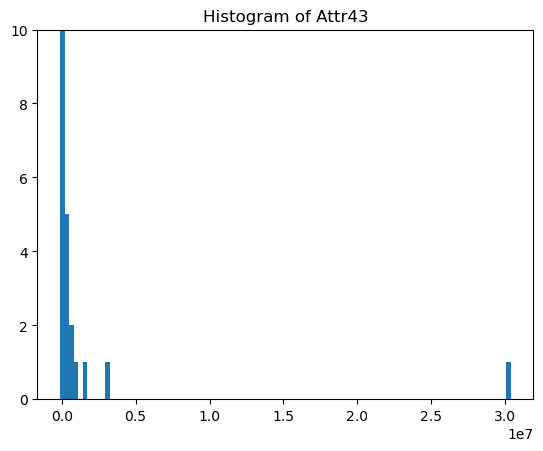

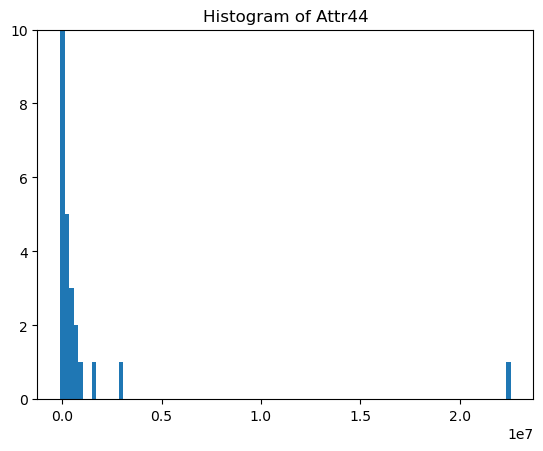

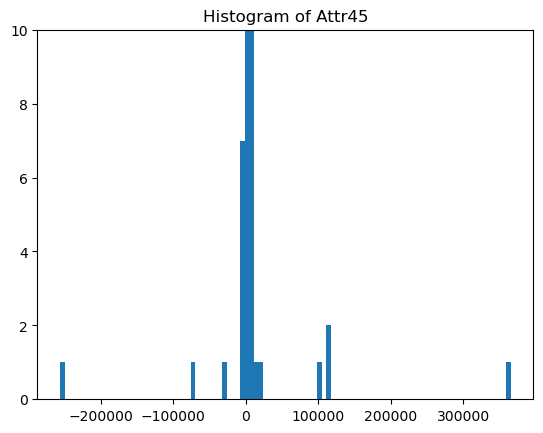

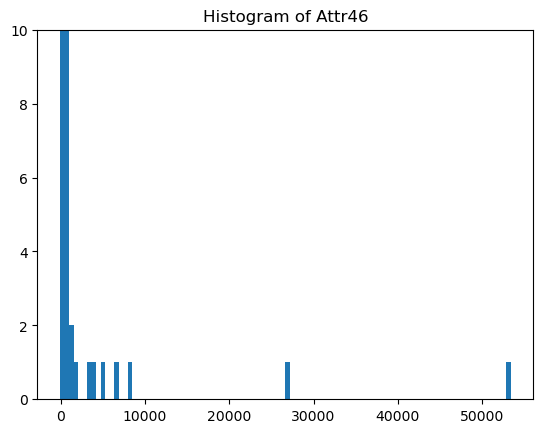

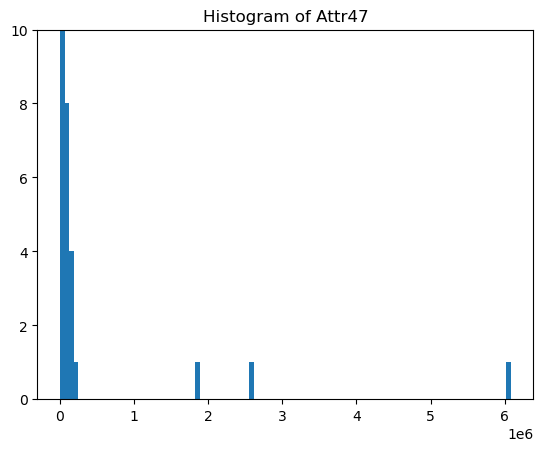

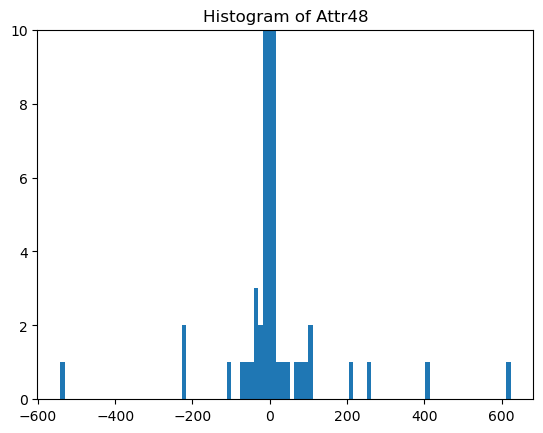

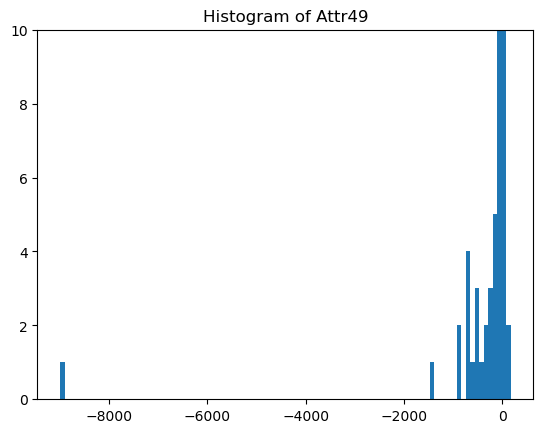

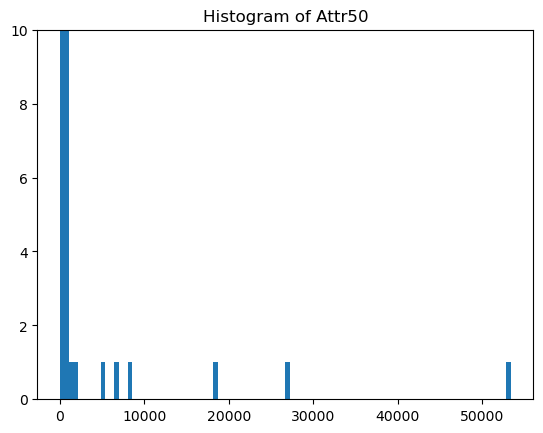

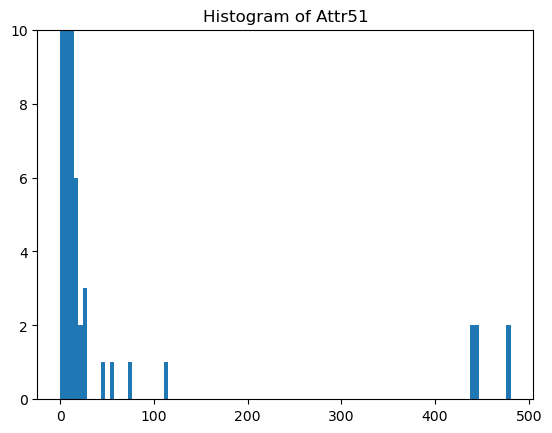

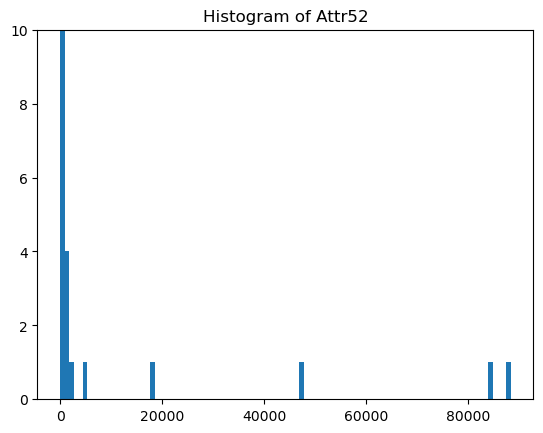

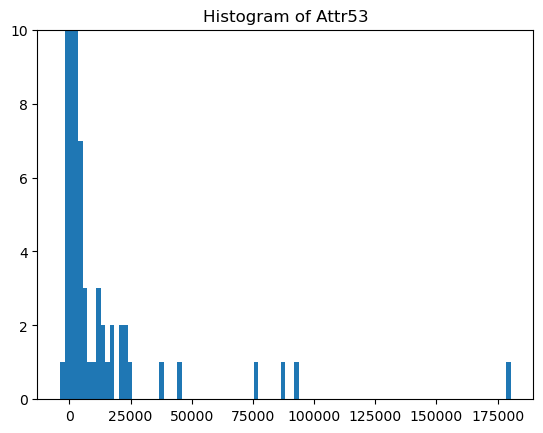

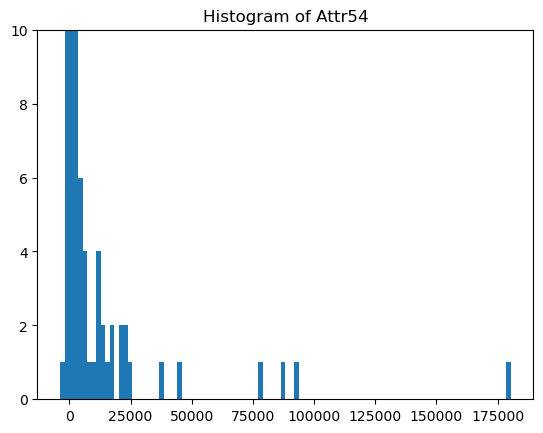

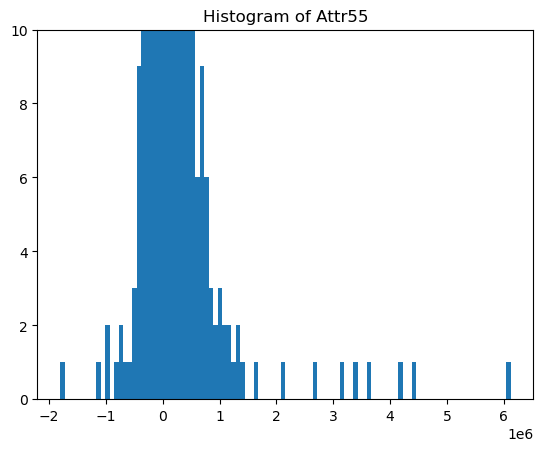

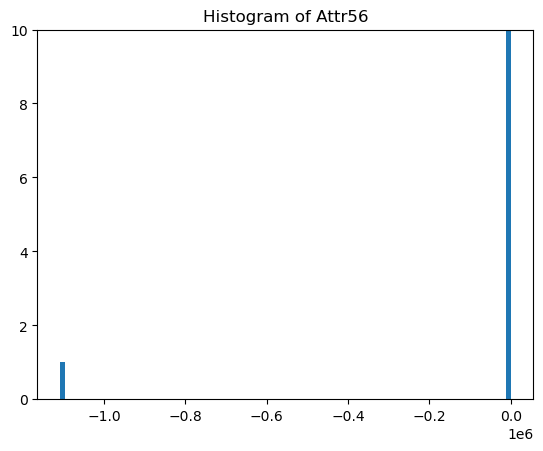

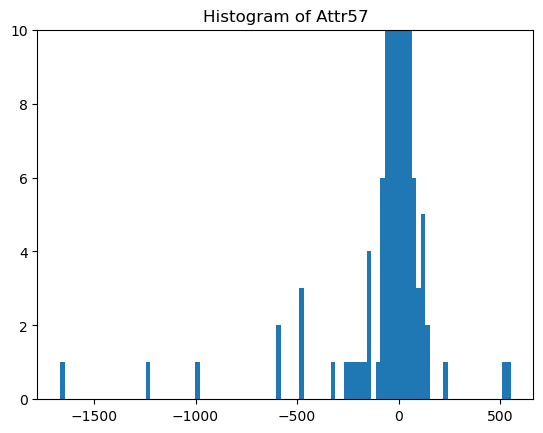

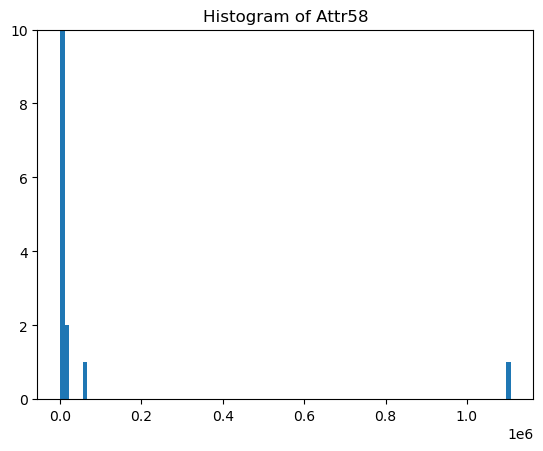

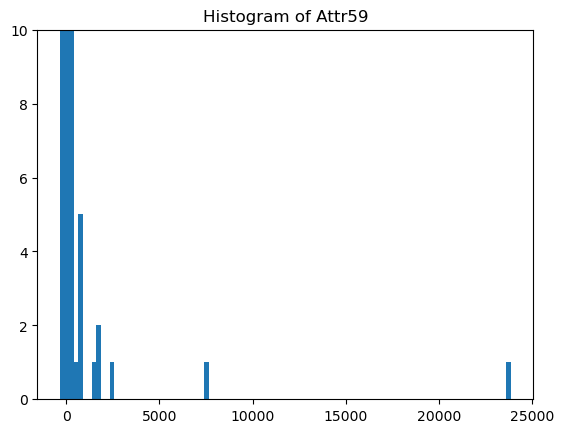

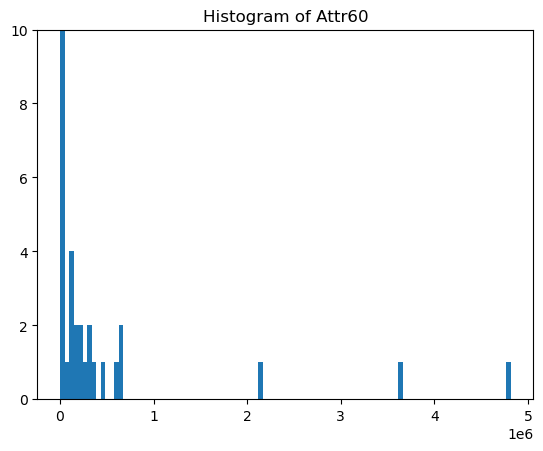

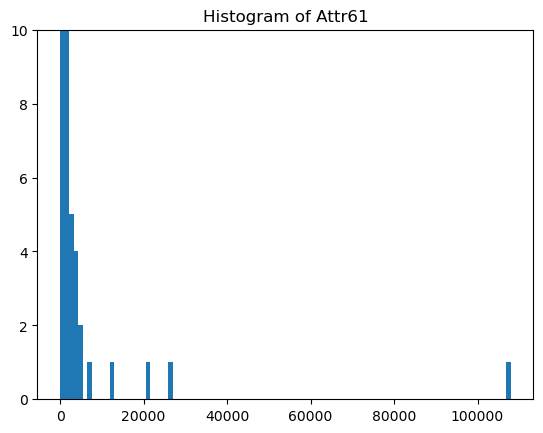

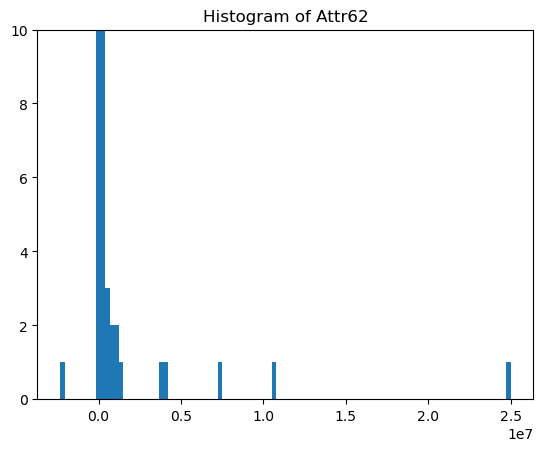

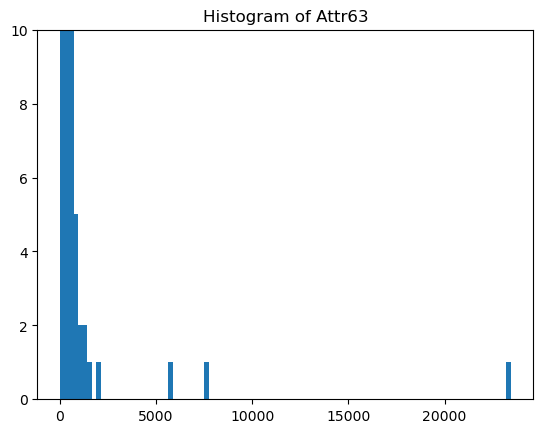

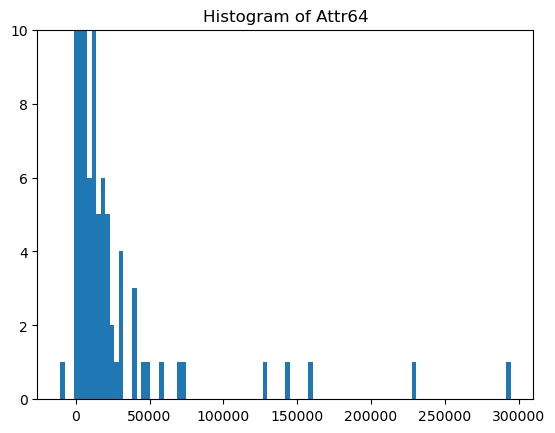

In [135]:
for i in missingData:
    
    plt.hist(data[i],bins=100)
    plt.ylim([0,10])
    plt.title(f'Histogram of {i}')
    plt.show()

In [136]:
# for i in missingData:
#     data[i].fillna(data[i].median(),inplace=True)
# missingData = []
# for i in data:
#     if data[i].isnull().sum() > 0:
#         print(i,':',data[i].isnull().sum(),'missing')
#         print(i,':',data[i].isnull().sum() / len(data),'%')
#         missingData.append(i)

In [137]:
# https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py


X_missing = data.drop('class', axis=1)
y_missing = data['class']

regressor = RandomForestRegressor(random_state = 42)

for col in X_missing.columns:
    X_missing_column = X_missing[[col]]

    def get_imputed_values(X_missing_column, y_missing):
        imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
        X_imputed = imputer.fit_transform(X_missing_column)
        return X_imputed

    X_imputed_column = get_imputed_values(X_missing_column, y_missing)

    data[col] = X_imputed_column[:, 0] 

data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0',1.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0',1.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0',1.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0',1.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0',1.0


In [138]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year
count,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,2.939753
std,2.993833,5.842209,5.438928,294.978029,6.118020e+04,7.200663,5.712548,505.346176,62.926207,14.669245,...,5.320062e+03,13.672969,5.329289e+03,122.094599,3.153355e+04,552.399187,1.390628e+05,123.985521,2347.072100,1.283975
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,1.000000
25%,0.003434,0.269010,0.021540,1.050800,-4.949000e+01,0.000000,0.005783,0.431070,1.018500,0.295530,...,8.959000e-03,0.014632,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800,2.000000
50%,0.049636,0.471940,0.196580,1.574000,-1.184000e+00,0.000000,0.059653,1.074100,1.195500,0.505990,...,5.270100e-02,0.119650,9.511200e-01,0.006389,1.040000e+01,6.649500,7.153500e+01,5.102900,4.389200,3.000000
75%,0.129560,0.688270,0.403260,2.806000,5.046100e+01,0.089441,0.150810,2.639100,2.063000,0.709090,...,1.287800e-01,0.284570,9.928000e-01,0.236280,2.389000e+01,10.443000,1.177400e+02,8.650900,10.461000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,5.000000


In [139]:
X = data.drop(columns='class')
y = data['class']
y = [int(item == b'1') for item in y]
print(y)
print(X.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [140]:
baseModel = RandomForestClassifier(n_estimators=10, n_jobs=-1)
cross_val_score(baseModel,X,y,scoring='accuracy')

array([0.9647506 , 0.96210114, 0.96233153, 0.96590255, 0.96728488])

In [173]:
#### HOURS TO RUN..... RESULTS ARE IN NEXT CELL #####

# gridsearch

# params = {
#     'n_estimators': [10],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5, 10, 15, 20, 30, 40],
#     'min_samples_split': [16, 12, 10, 8, 6],
#     'min_samples_leaf': [6, 5, 4, 3, 2],
#     'max_features': [5, 10, 15, 20, 30, 40]
# }

# rfModel = RandomForestClassifier()

# grid_searchModel = GridSearchCV(
#     rfModel,
#     params,
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )
# grid_searchModel.fit(X, y)

# best_rf_params = grid_searchModel.best_params_

# best_rf_params




Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 10}

In [174]:
##### Results for the super long gridsearch #####

# Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
# {'criterion': 'entropy',
#  'max_depth': 30,
#  'max_features': 40,
#  'min_samples_leaf': 4,
#  'min_samples_split': 12,
#  'n_estimators': 10}

best_params = best_rf_params

In [141]:
# ramdom search

params = {'n_estimators':[10],
          'criterion':['gini','entropy'],
          'max_depth':[5,10,15,20,30,40],
          'min_samples_split':[16,12,10,8,6],
          'min_samples_leaf':[6,5,4,3,2],
          'max_features':[5,10,15,20,30,40]}

rfModel = RandomForestClassifier()

searchModel = RandomizedSearchCV(rfModel,
                                 params,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True)
searchModel.fit(X,y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30, 40],
                                        'max_features': [5, 10, 15, 20, 30, 40],
                                        'min_samples_leaf': [6, 5, 4, 3, 2],
                                        'min_samples_split': [16, 12, 10, 8, 6],
                                        'n_estimators': [10]},
                   verbose=True)

In [142]:
best_params = searchModel.best_params_

In [143]:
searchModel.best_score_

0.972284299043889

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf_classifier = RandomForestClassifier(**best_params)

best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9721230273010022


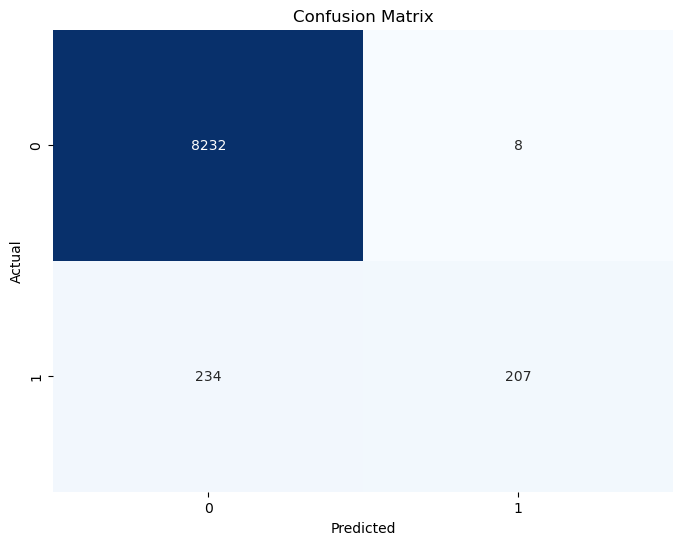

In [176]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [177]:
rf_importances = best_rf_classifier.feature_importances_

rf_feature_names = X.columns

rf_feature_importance_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_importances})

sorted_rf_feature_importance = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

sorted_rf_feature_importance

,Feature,Importance
33,Attr34,0.142721
26,Attr27,0.107909
45,Attr46,0.056671
4,Attr5,0.040675
23,Attr24,0.034985
...,...,...
17,Attr18,0.002355
6,Attr7,0.002041
1,Attr2,0.001674
9,Attr10,0.001628


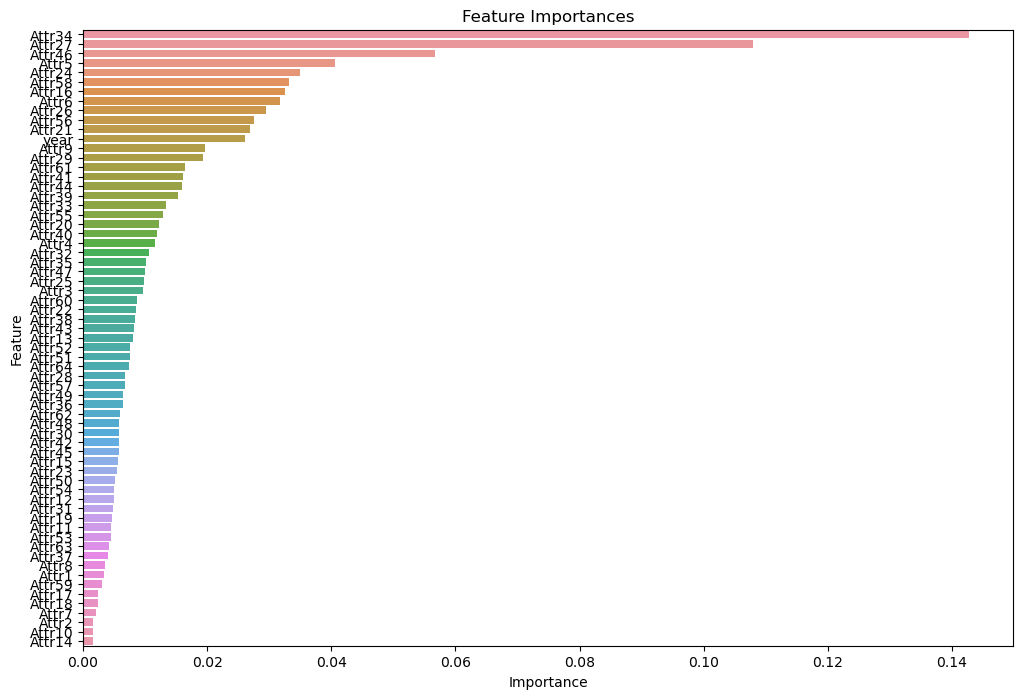

In [178]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Importance',
            y = 'Feature',
            data = sorted_rf_feature_importance)

plt.title('Feature Importances')
plt.show()

In [170]:
#### HOURS TO RUN..... RESULTS ARE IN NEXT CELL #####


# Gridsearch
# params = {
#     'n_estimators': [10],
#     'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
#     'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
#     'min_child_weight': [1, 3, 5, 7],
#     'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
#     'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
# }

# xgbModel = xgb.XGBClassifier()

# grid_searchModel = GridSearchCV(
#     xgbModel,
#     params,
#     cv=5,
#     n_jobs=-1,
#     verbose=True
# )
# grid_searchModel.fit(X, y)

# best_xgb_params = grid_searchModel.best_params_

# best_xgb_params


Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.3,
 'max_depth': 15,
 'min_child_weight': 5,
 'n_estimators': 10}

In [ ]:
#### RESULTS FOR THE SUPER LONG GRIDSEARCH ####

# Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
# {'colsample_bytree': 0.7,
#  'gamma': 0.1,
#  'learning_rate': 0.3,
#  'max_depth': 15,
#  'min_child_weight': 5,
#  'n_estimators': 10}

In [148]:
# randomizedsearch

# https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73
# ideas for which parameters to test came from above

params = {
    'n_estimators':[10],
    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]
}

xgbModel = xgb.XGBClassifier()

xgb_searchModel = RandomizedSearchCV(
    xgbModel,
    params,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=True
)
xgb_searchModel.fit(X, y)

best_xgb_params = xgb_searchModel.best_params_

best_xgb_params


Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 10,
 'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [149]:
xgb_searchModel.best_score_

0.9732519295012094

In [179]:
best_xgb_classifier = xgb.XGBClassifier(**best_xgb_params)

best_xgb_classifier.fit(X_train, y_train)

y_pred_xgb = best_xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9721230273010022


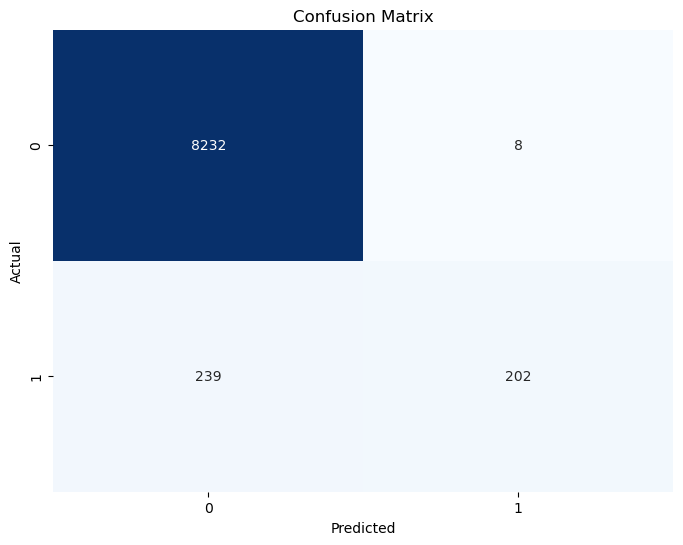

In [180]:
confusion = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [181]:
xgb_importances = best_xgb_classifier.feature_importances_

xgb_feature_names = X.columns

xgb_feature_importance_df = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_importances})

sorted_xgb_feature_importance = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

sorted_xgb_feature_importance

,Feature,Importance
33,Attr34,0.093330
26,Attr27,0.065469
64,year,0.051139
34,Attr35,0.045190
25,Attr26,0.042697
...,...,...
58,Attr59,0.004560
32,Attr33,0.004048
0,Attr1,0.002213
17,Attr18,0.000423


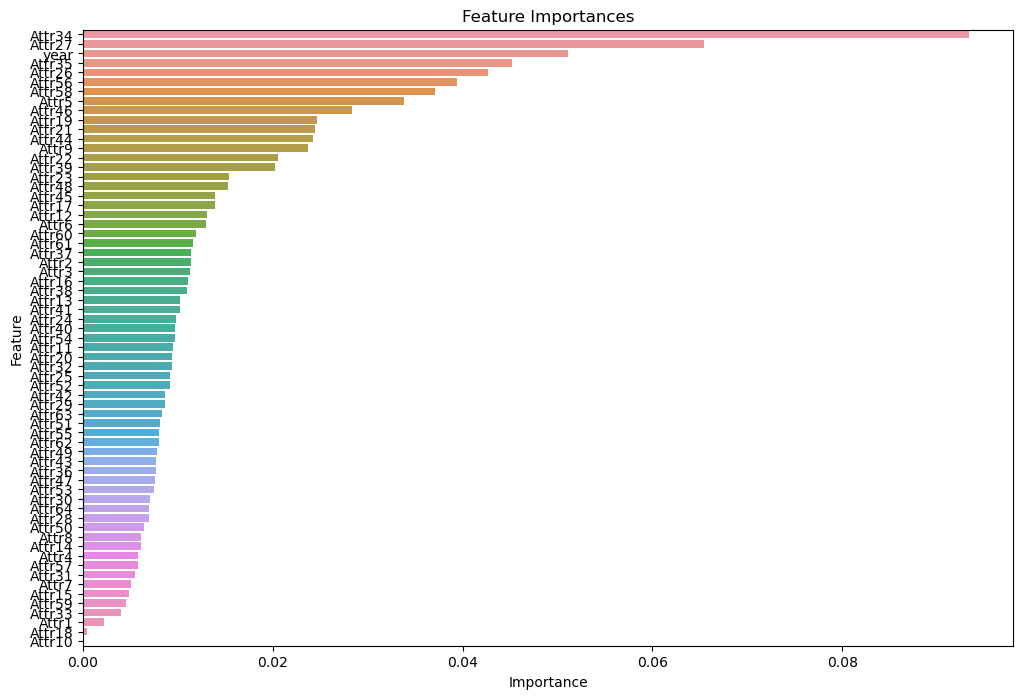

In [182]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Importance',
            y = 'Feature',
            data = sorted_xgb_feature_importance)

plt.title('Feature Importances')
plt.show()

In [183]:
top_10_rf = sorted_rf_feature_importance.head(10)
top_10_xgb = sorted_xgb_feature_importance.head(10)

top_10_features_rf = set(top_10_rf['Feature'])
top_10_features_xgb = set(top_10_xgb['Feature'])

common_features_in_order = []
for feature in top_10_rf['Feature']:
    if feature in top_10_features_xgb:
        common_features_in_order.append(feature)

print('Common features within the top 10 of both in order:')
for idx, feature in enumerate(common_features_in_order, start = 1):
    print(f'{idx}. {feature}')


Common features within the top 10 of both in order:
1. Attr34
2. Attr27
3. Attr46
4. Attr5
5. Attr58
6. Attr26
7. Attr56


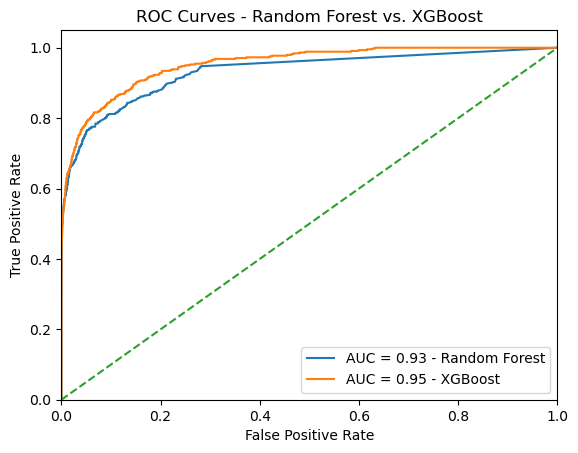

In [184]:
y_prob_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

y_prob_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.plot(fpr_rf, tpr_rf,label='AUC = {:.2f} - Random Forest'.format(roc_auc_rf))
plt.plot(fpr_xgb, tpr_xgb, label='AUC = {:.2f} - XGBoost'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1],  linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Random Forest vs. XGBoost')

plt.legend()
plt.show()
